# 1. Importation des modules

In [1]:
from myfunctions import *
import numpy as np
import pandas as pd
import missingno as msno

from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# 2. Importation de la base et première analyse

In [2]:
df = pd.read_csv("../data/AmesHousing.csv")

In [3]:
df.shape

(2930, 82)

In [4]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

print(f"num_col shap : {num_col.shape}")
print(f"num_col columns : {num_col.columns}")
print(f"cat_col shap : {cat_col.shape}")
print(f"cat_col columns : {cat_col.columns}")

num_col shap : (2930, 39)
num_col columns : Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
cat_col shap : (2930, 43)
cat_col columns : Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterio

# 3. Missing Data

<AxesSubplot:>

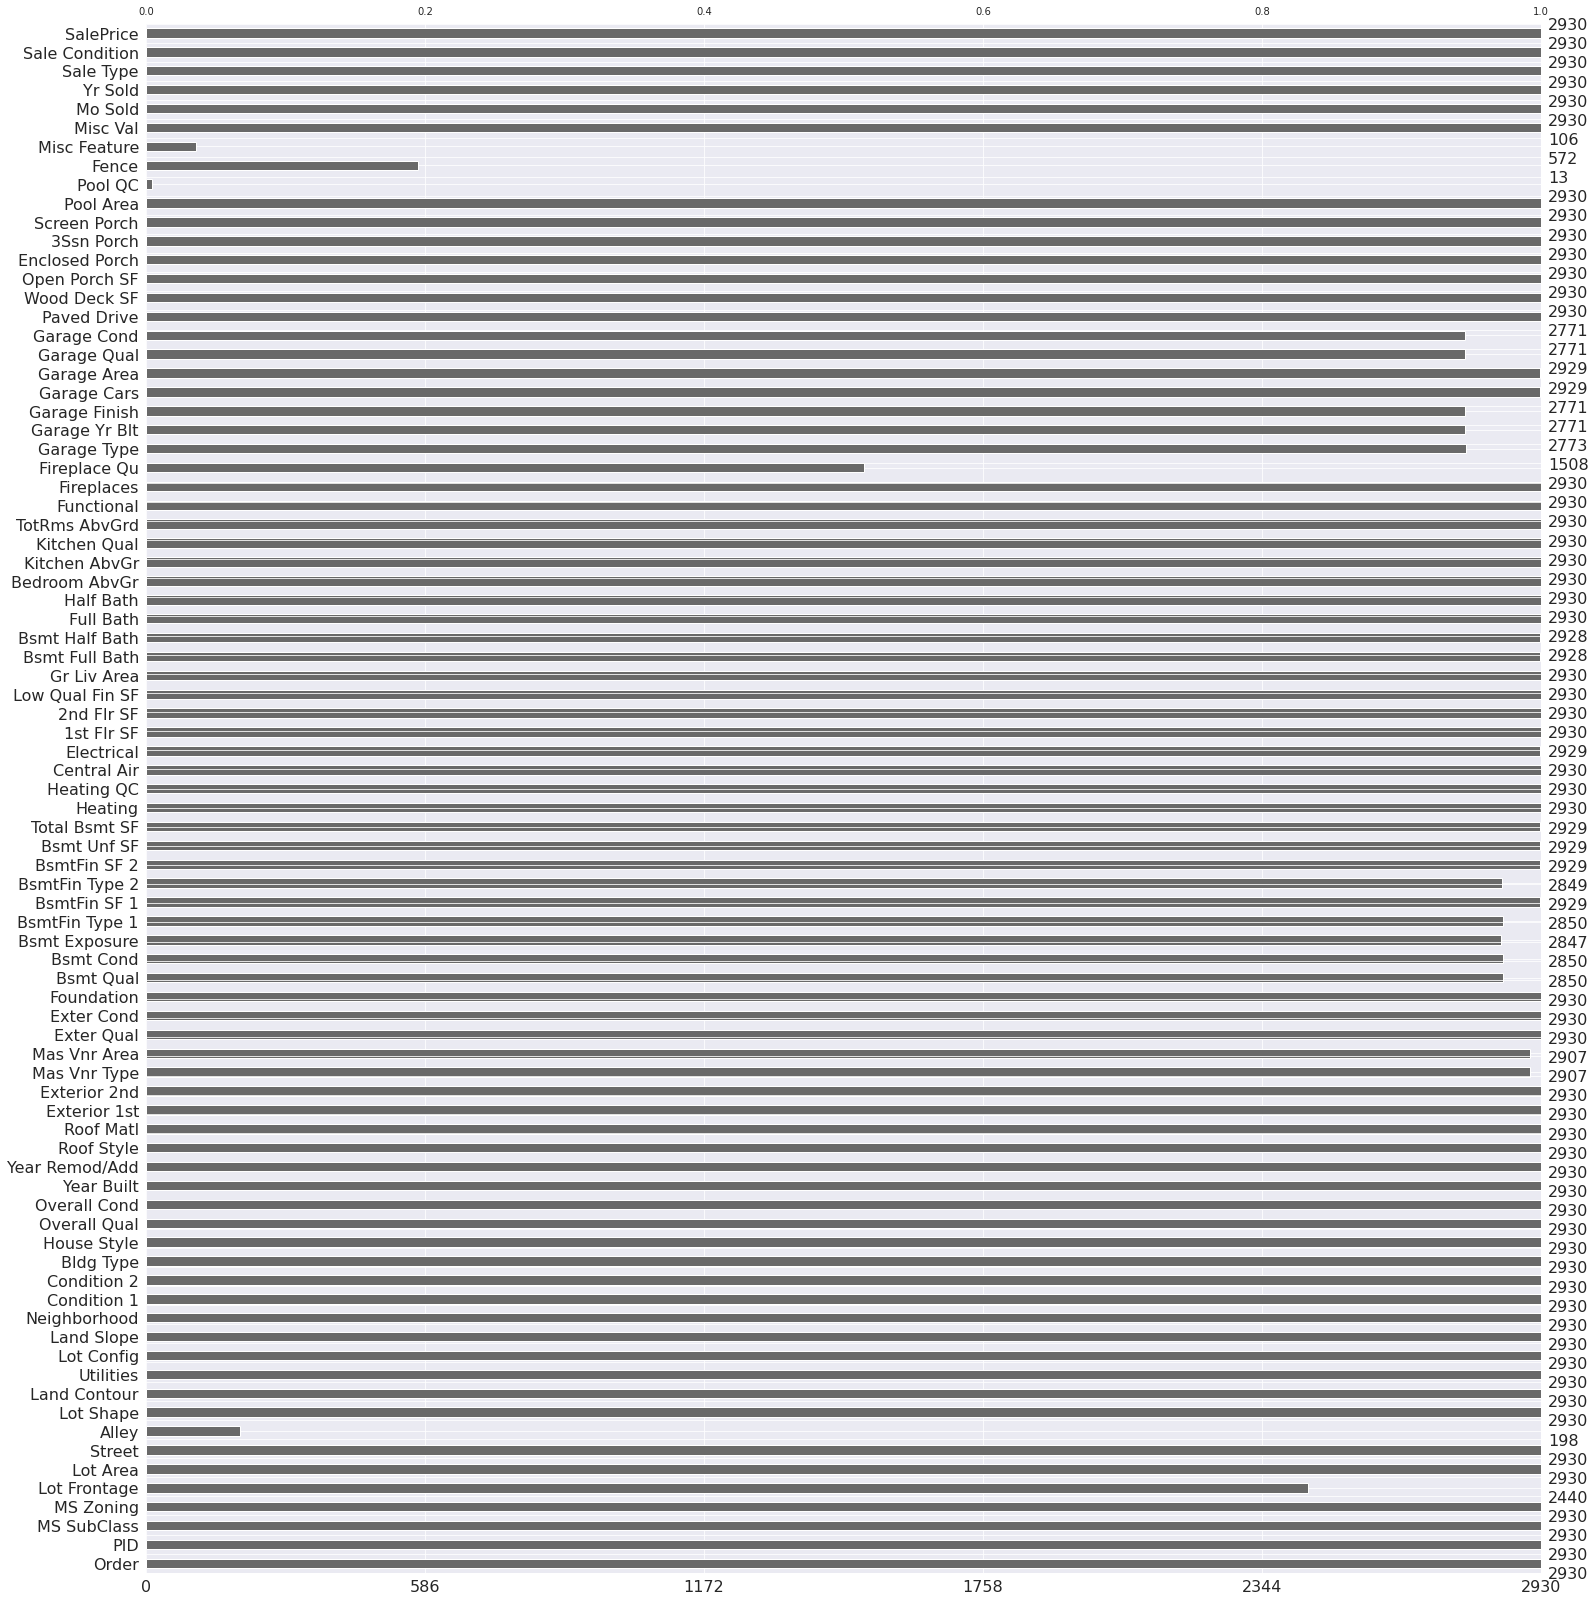

In [8]:
msno.bar(df)

<AxesSubplot:>

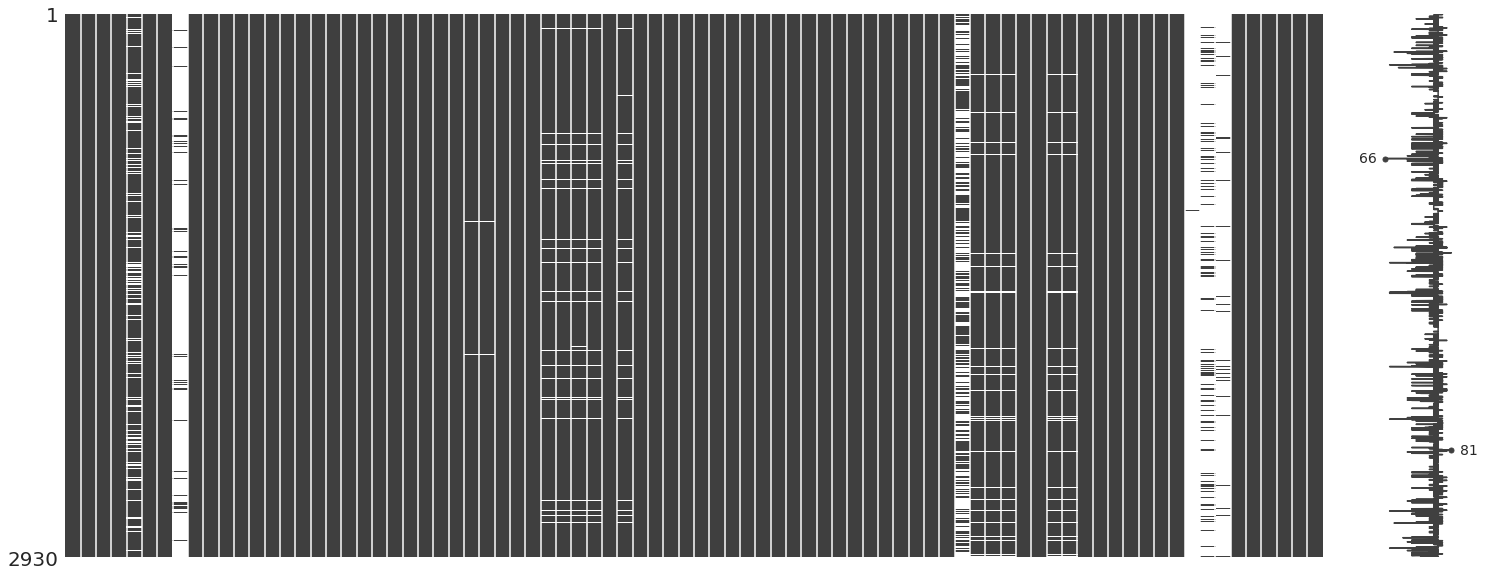

In [9]:
msno.matrix(df)

<AxesSubplot:>

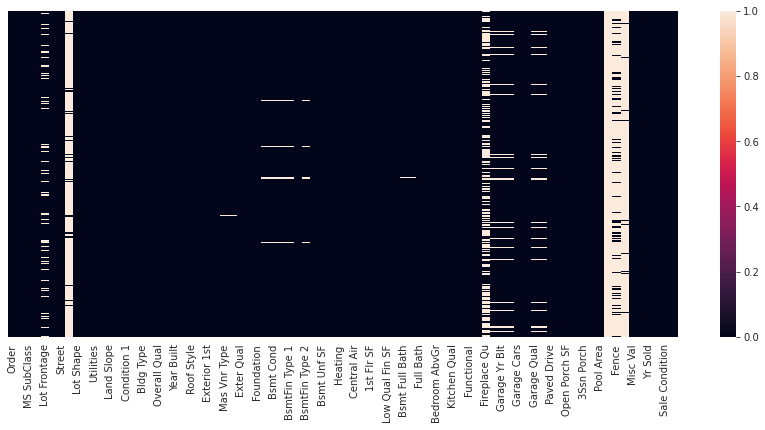

In [10]:
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
df.isna().sum().sort_values(ascending=False).head(30)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
Garage Cars          1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Area          1
Paved Drive          0
Full Bath            0
Half Bath            0
dtype: int64

In [12]:
missing_values_summary(df).head(30)

,Missing Count,Percentage Missing %
Pool QC,2917,99.556314
Misc Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Fireplace Qu,1422,48.532423
Lot Frontage,490,16.723549
Garage Cond,159,5.426621
Garage Finish,159,5.426621
Garage Yr Blt,159,5.426621
Garage Qual,159,5.426621


On supprime les colonnes inutiles ou avec trop de valeurs nulles

In [13]:
df = df.drop(["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"], axis=1)

In [14]:
df.shape

(2930, 75)

# 4. séparation des jeux entre train et split pour ne pas avoir de data leaking

In [15]:
y = df["SalePrice"]
X = df.drop(["SalePrice"], axis =1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Analyse de données

### SalePrice Distribution

In [17]:
prices = pd.DataFrame({"log(price)":np.log1p(df["SalePrice"]), "price":df["SalePrice"]})


/tmp/ipykernel_65477/2390060031.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['price'], ax=axes[0], label='Price', hist_kws={'alpha': 0.5})
/tmp/ipykernel_65477/2390060031.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices['log(price)'], ax=axes[1], label='Log(Price)', his

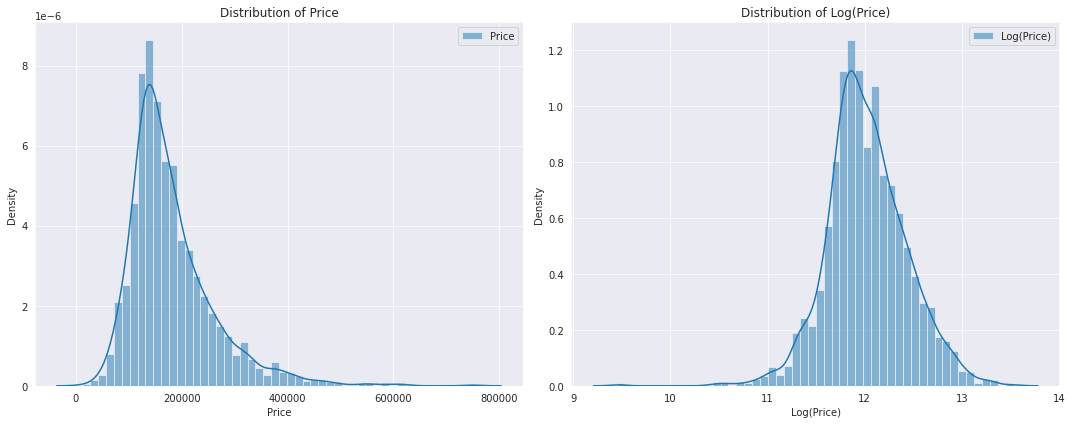

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have imported the necessary libraries and have your DataFrame 'prices' available.

# Create a new figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for 'price'
sns.distplot(prices['price'], ax=axes[0], label='Price', hist_kws={'alpha': 0.5})
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Price')
axes[0].legend()

# Plot the histogram for 'log(price + 1)'
sns.distplot(prices['log(price)'], ax=axes[1], label='Log(Price)', hist_kws={'alpha': 0.5})
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Log(Price)')
axes[1].legend()

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


### Describe + Kurtosis + Skewness

In [19]:
extended_describe_all_columns(prices)

,log(price),price
count,2930.000000,2930.000000
mean,12.020975,180796.060068
std,0.407584,79886.692357
min,9.456419,12789.000000
25%,11.771444,129500.000000
50%,11.982935,160000.000000
75%,12.271397,213500.000000
max,13.534474,755000.000000
kurtosis,1.509189,5.108122
skewness,-0.014765,1.742607


<AxesSubplot:>

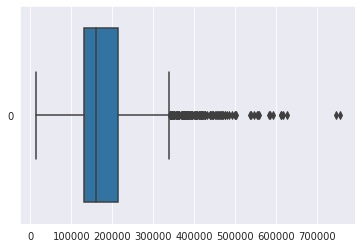

In [20]:
sns.boxplot(prices['price'], orient= 'h')

### Trouver les variables Quantitatives et Qualitatives

In [21]:

# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

In [22]:
print(num_col.shape)
print(num_col.columns)

(2930, 37)
Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')


In [23]:
print(cat_col.shape)
print(cat_col.columns)

(2930, 38)
Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')


# 6. Analyse des variables quantitatives

array([[<AxesSubplot:title={'center':'MS SubClass'}>,
        <AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Overall Cond'}>,
        <AxesSubplot:title={'center':'Year Built'}>],
       [<AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>,
        <AxesSubplot:title={'center':'Total Bsmt SF'}>],
       [<AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>,
        <AxesSubplot:title={'center':'Bsmt Half Bath'}>],
       [<A

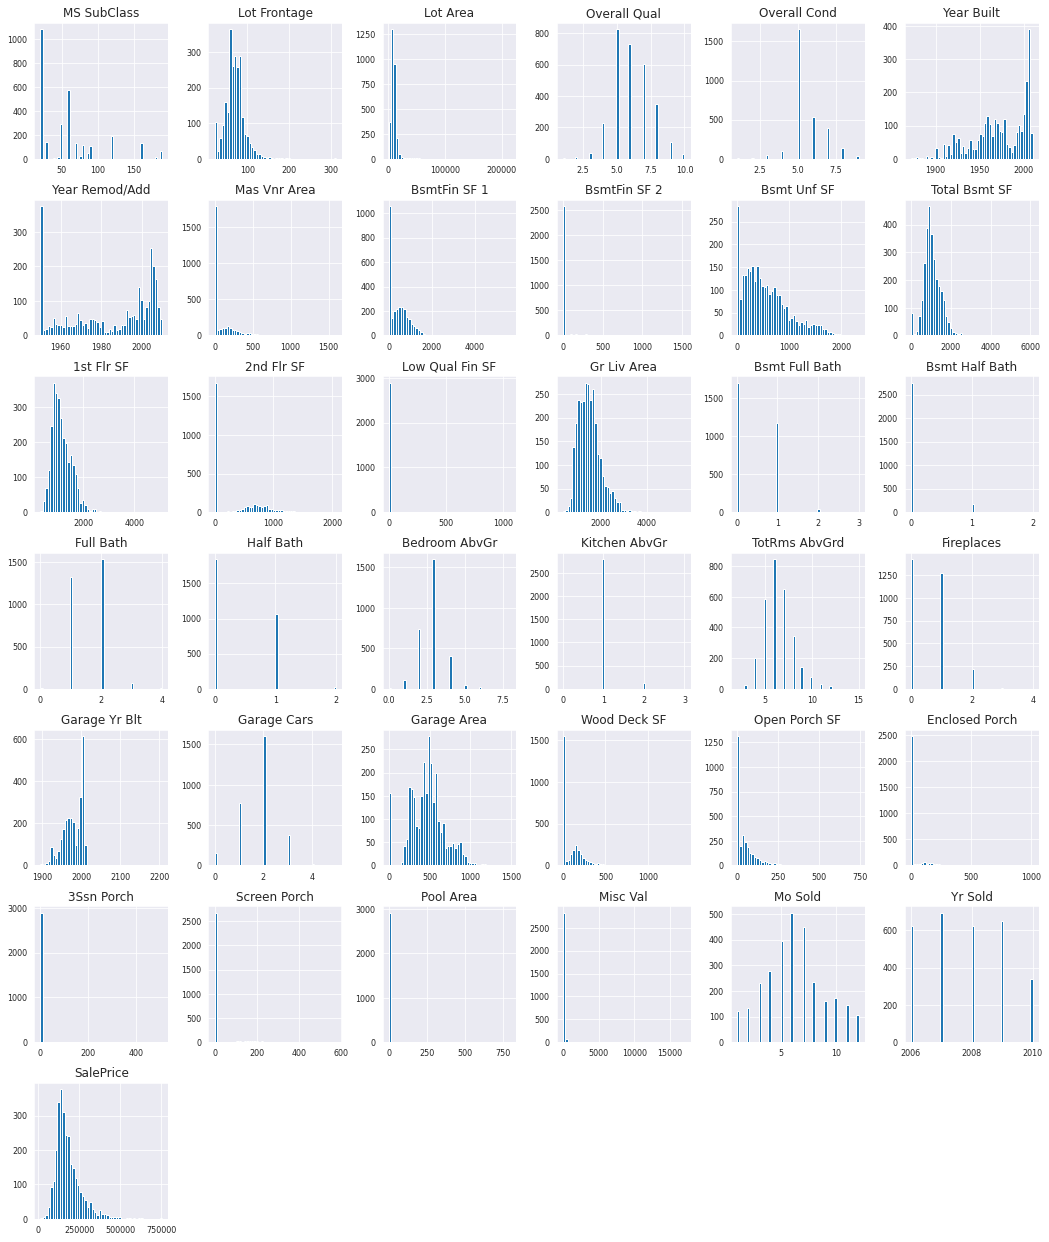

In [24]:
num_col.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

On supprimer les colonnes avec une valeur unique

In [25]:
to_drop = [ 'BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch',
        'Pool Area', 'Misc Val', "3Ssn Porch"]

In [26]:
df= df.drop(to_drop,axis=1)
# Assuming 'df' is your DataFrame
# Get numeric variables (int64 and float64)
num_col = df.select_dtypes(include=['int64', 'float64'])

# Get categorical variables (object data type)
cat_col = df.select_dtypes(include=['object'])

array([[<AxesSubplot:title={'center':'MS SubClass'}>,
        <AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Overall Cond'}>],
       [<AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'Bsmt Unf SF'}>],
       [<AxesSubplot:title={'center':'Total Bsmt SF'}>,
        <AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Bsmt Full Bath'}>],
       [<AxesSubplot:title={'center':'Bsmt Half Bath'}>,
        <AxesSubplot:title={'center':'Full Bath'}>,
        <AxesSubplot:title={'center':'Half Bath'}>,
        <AxesSubplo

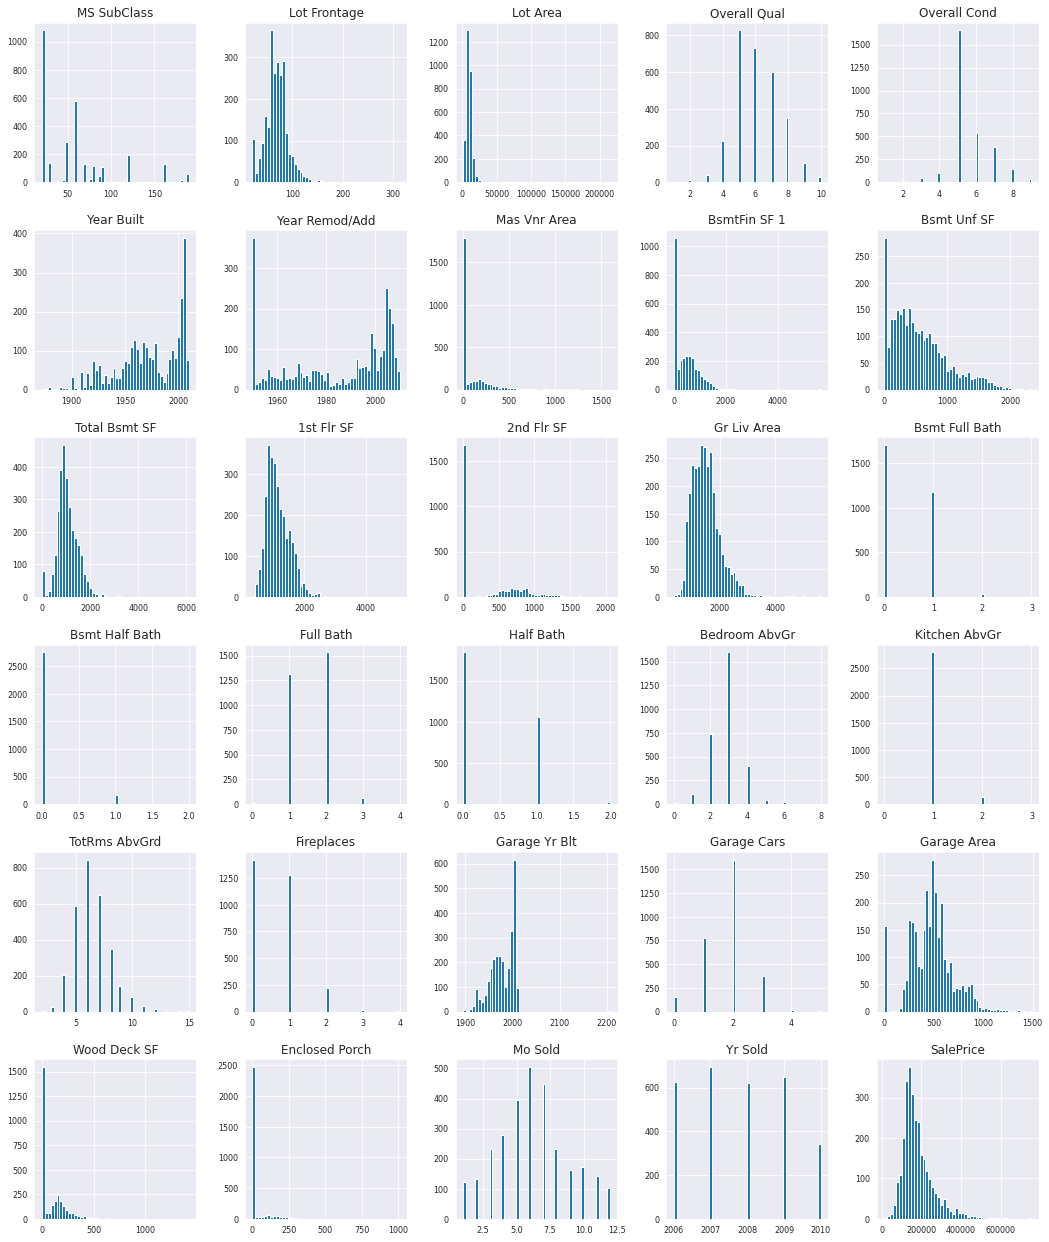

In [27]:
num_col.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

# 7. Analyse des variables catégorielles

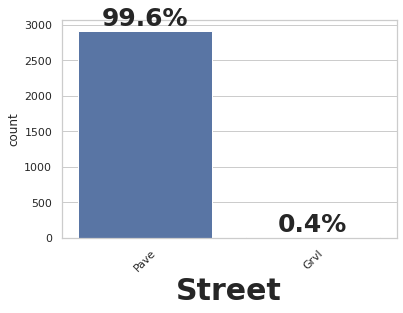

In [28]:

sns.set(style="whitegrid")

# Assuming 'Street' is the column name containing the categories in your DataFrame 'df'
sns.countplot(x='Street', data=df)

# Calculate percentages for each category
total_count = df['Street'].count()
category_counts = df['Street'].value_counts()
category_percentages = (category_counts / total_count) * 100

# Optional: Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each bar with its corresponding percentage (bigger font size)
ax = plt.gca()
for p in ax.patches:
    percentage = f"{p.get_height() / total_count * 100:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=25, weight='bold')  # Adjust fontsize and weight as needed

# Set the x-axis title and make it bigger
plt.xlabel("Street", fontsize=30, weight='bold')  # Adjust fontsize and weight as needed

# Show the plot
plt.show()

On commence par rechercher les colonnes dont la distribution est la plus déséquilibrée

On peut distinguer:
- les colonnes complétement déséquilibrées (une valeur pèse au moins 95%) : on les supprime
- les colonnes déséquilibrées (une valeur pèse au moins 85%): s'il n'y a pas d'écart significatif entre les moyennes de saleprice pour chaque catégorie, on les supprime également.

In [29]:
highly_unbalanced_col = calculate_category_variables(cat_col, threshold_min=96, threshold_max=100)
print(highly_unbalanced_col)

['Street', 'Utilities', 'Condition 2', 'Roof Matl', 'Heating', 'Garage Cond']


In [30]:
unbalanced_col = calculate_category_variables(cat_col, threshold_min=85, threshold_max=95)
print(unbalanced_col)

['Land Contour', 'Condition 1', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 2', 'Central Air', 'Electrical', 'Functional', 'Garage Qual', 'Paved Drive', 'Sale Type']


In [31]:
df = df.drop(highly_unbalanced_col, axis=1)

In [32]:
df[["Land Slope", "SalePrice"]].groupby(by="Land Slope").mean()

,SalePrice
Land Slope,
Gtl,179565.365005
Mod,204853.784000
Sev,207370.625000


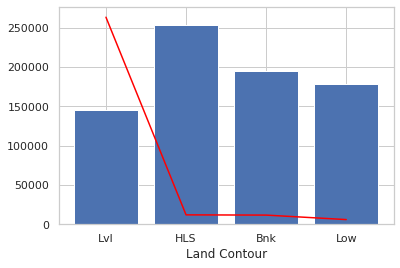

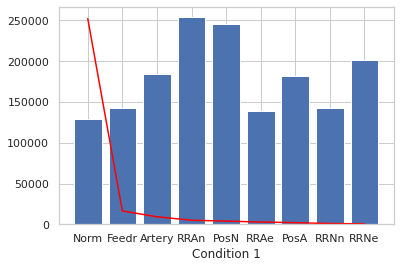

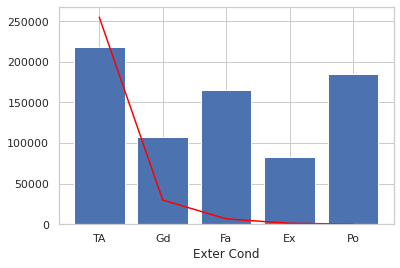

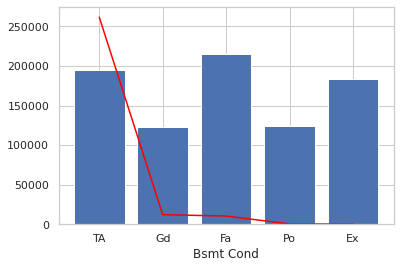

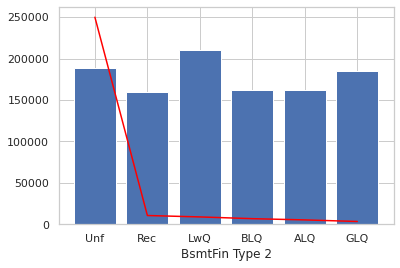

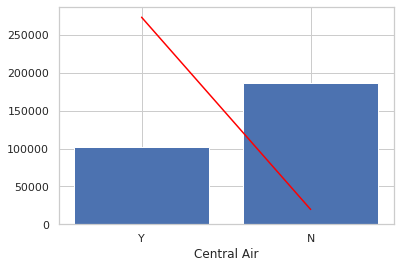

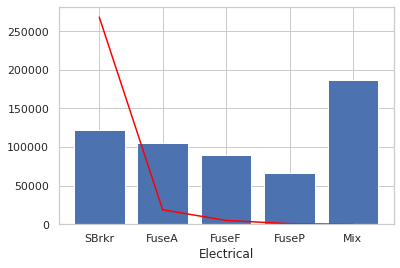

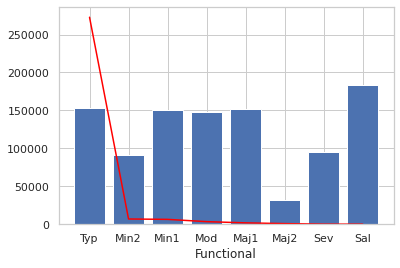

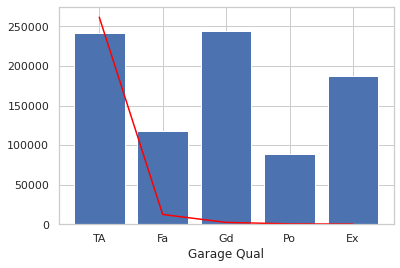

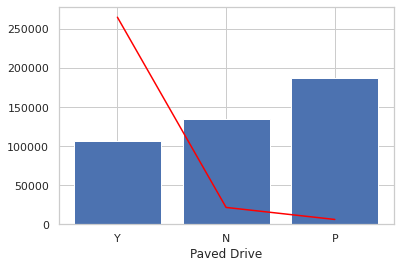

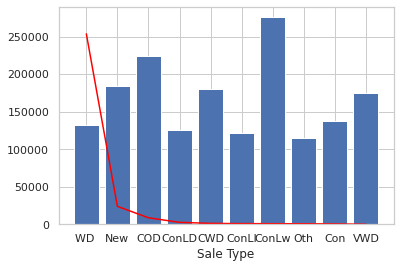

In [33]:
for i,col in enumerate(unbalanced_col,1): 
    plt.figure()
    df_fig = df[[col, "SalePrice"]].groupby(by=col).mean()
    plt.bar(df_fig.index, df_fig.SalePrice)
    df[col].value_counts().apply(lambda x:x*100).plot(kind='line',c="red")
    plt.xlabel(col)
    plt.show()

In [34]:
to_keep = [ "Land Contour", "Bldg Type", "Exter Cond", "Bsmt Cond",  "Central Air"]
to_drop =  ["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
df = df.drop(to_drop, axis=1)

In [35]:
["Order","PID","Alley","Fireplace Qu","Pool QC","Fence","Misc Feature"]
["Land Slope",  "Condition 1", "BsmtFin Type 2", "Bsmt Half Bath", "Kitchen AbvGr","Sale Type"]
["Street","Utilities", "Condition 2","Roof Matl", "Heating", "Functional","Garage Qual","Garage Cond"]
['BsmtFin SF 2','Low Qual Fin SF', 'Open Porch SF','Screen Porch','Pool Area', 'Misc Val', "3Ssn Porch"]

['BsmtFin SF 2',
 'Low Qual Fin SF',
 'Open Porch SF',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 '3Ssn Porch']

## Analyse des corrélations

In [36]:
df.shape

(2930, 56)

In [37]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

ModuleNotFoundError: No module named 'dython'

In [ ]:
complete_correlation= associations(df,compute_only=True)

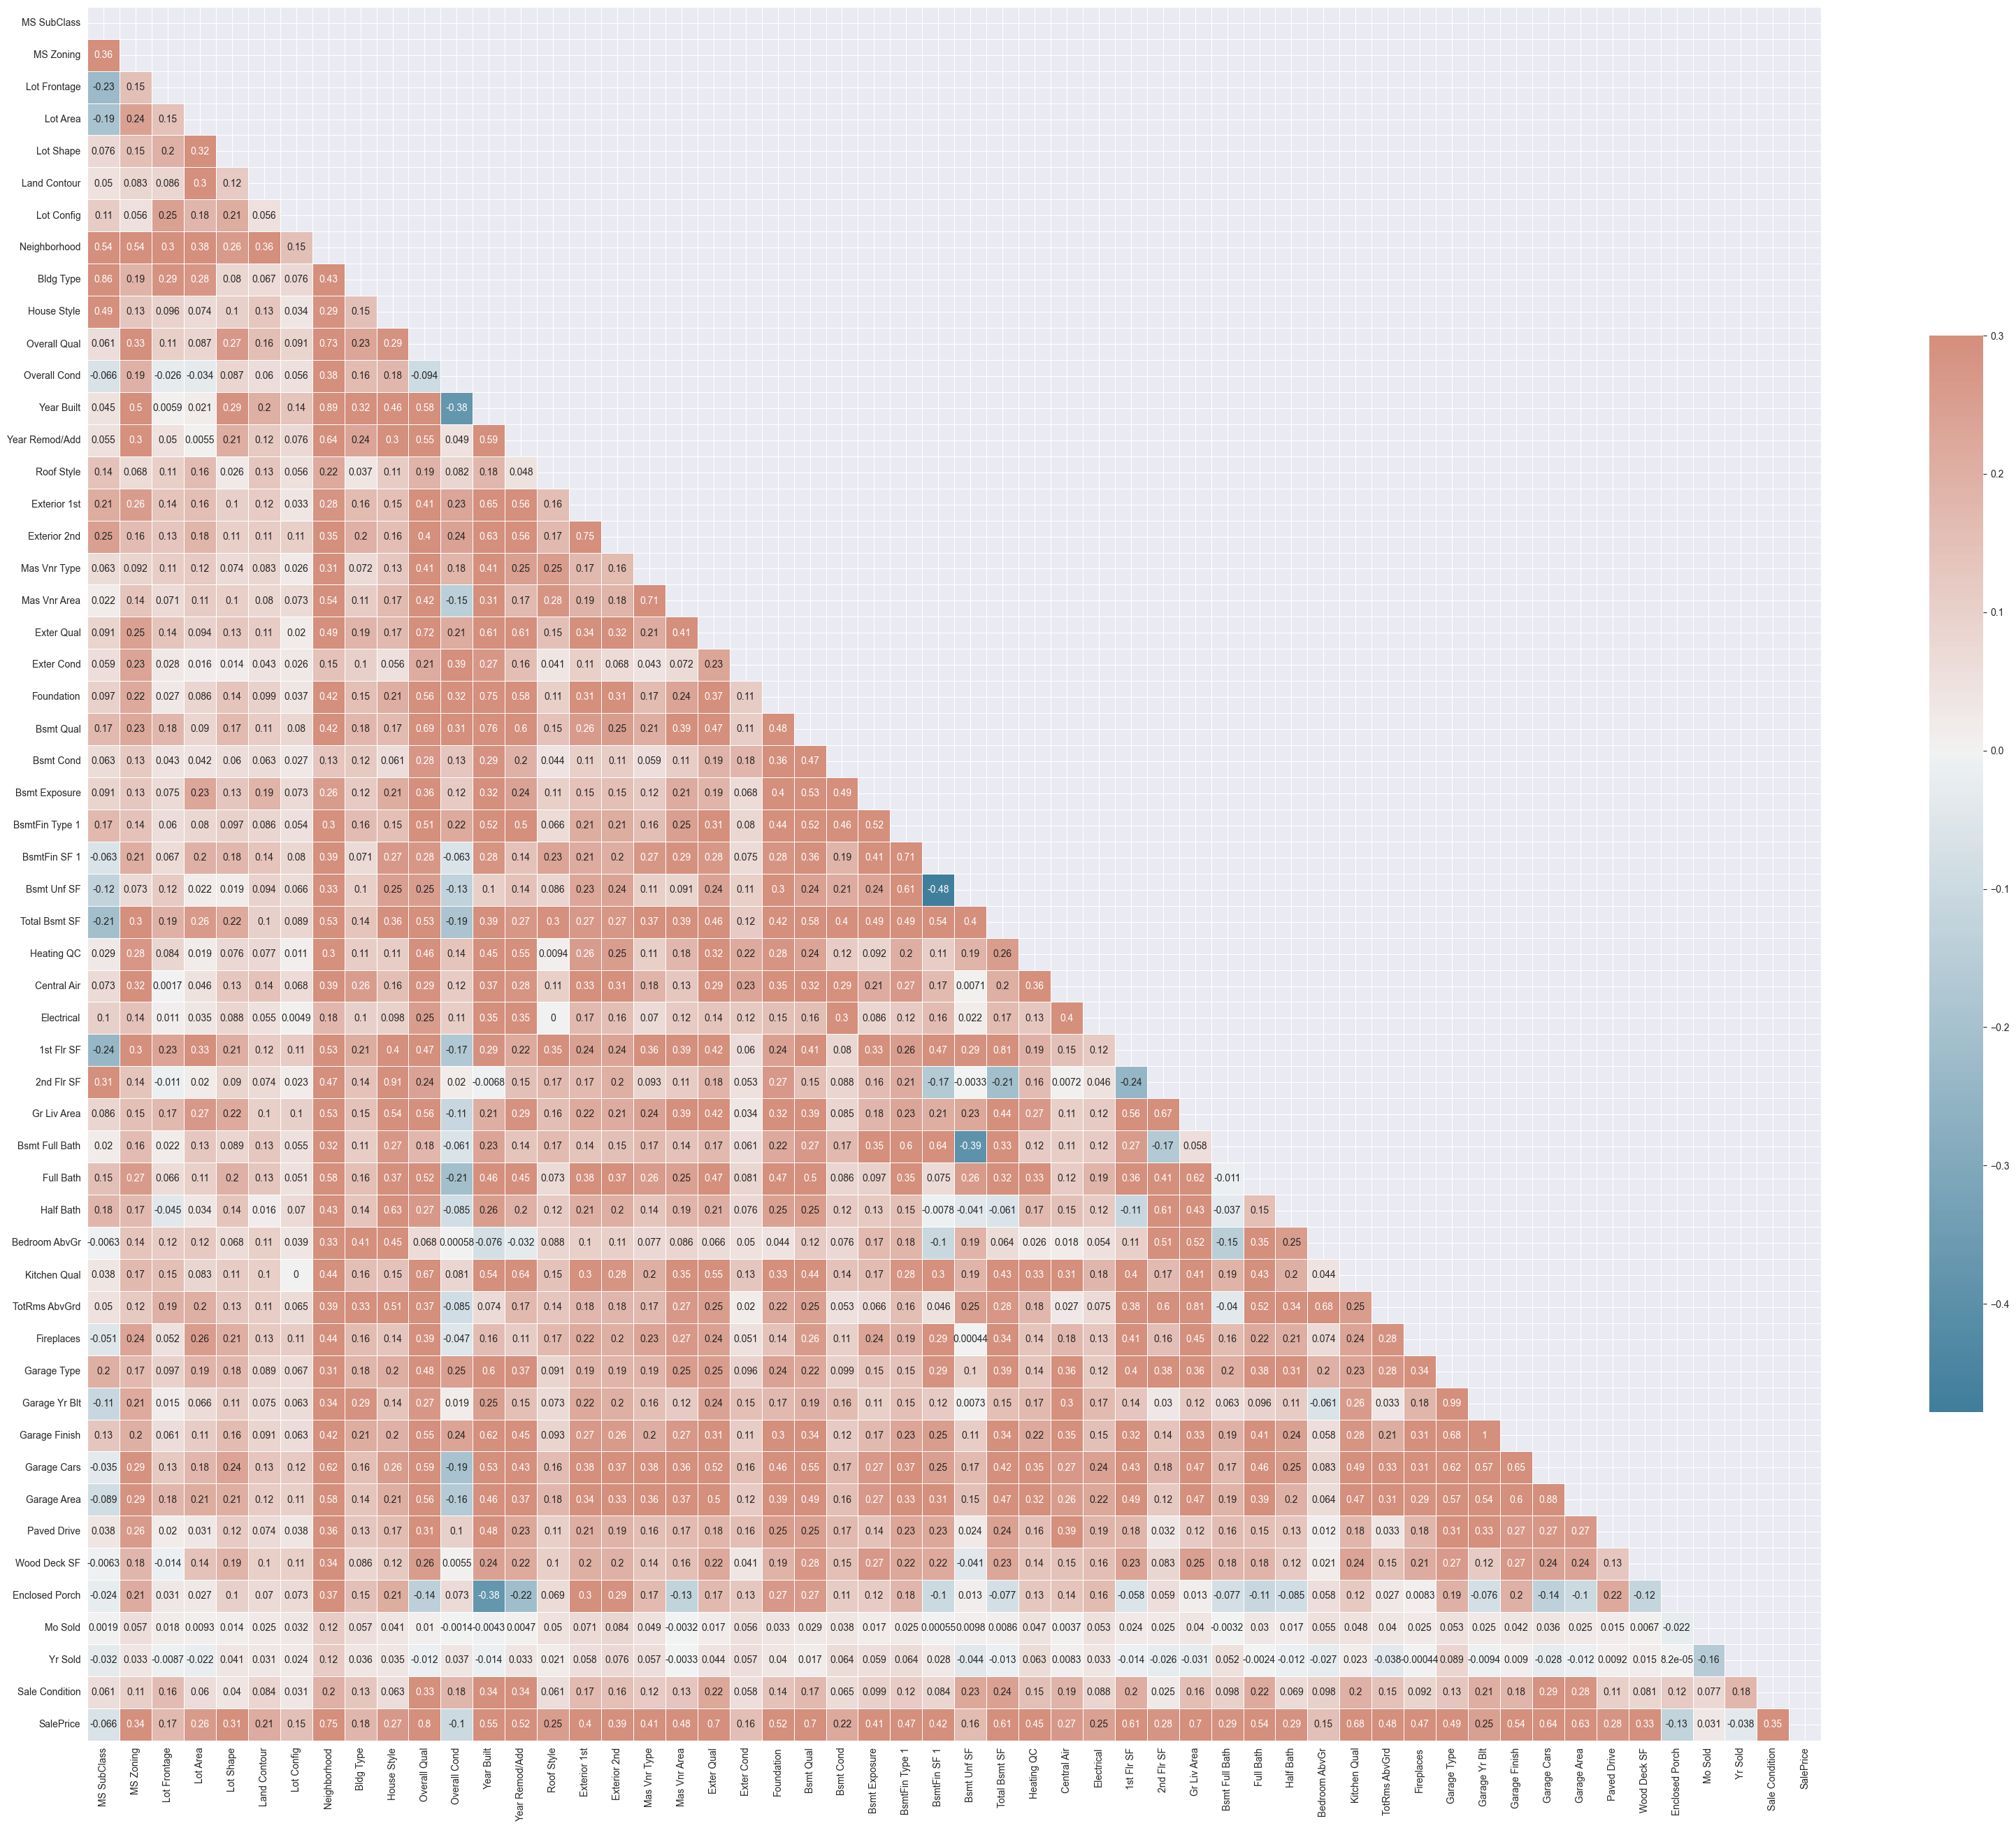

In [ ]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

In [ ]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Enclosed Porch',
       'Mo Sold', 'Yr Sold', 'Sale Condition', 'SalePrice'],
      dtype='object')

In [ ]:
sub_selection = ['Neighborhood', 'Overall Qual', 'Year Built',
       'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 
       'Gr Liv Area', 'Full Bath', 'Kitchen Qual',  'Garage Finish', 'Garage Cars',
       'Garage Area', 'SalePrice']

In [ ]:
df_sub_selection = df[sub_selection]

<Axes: >

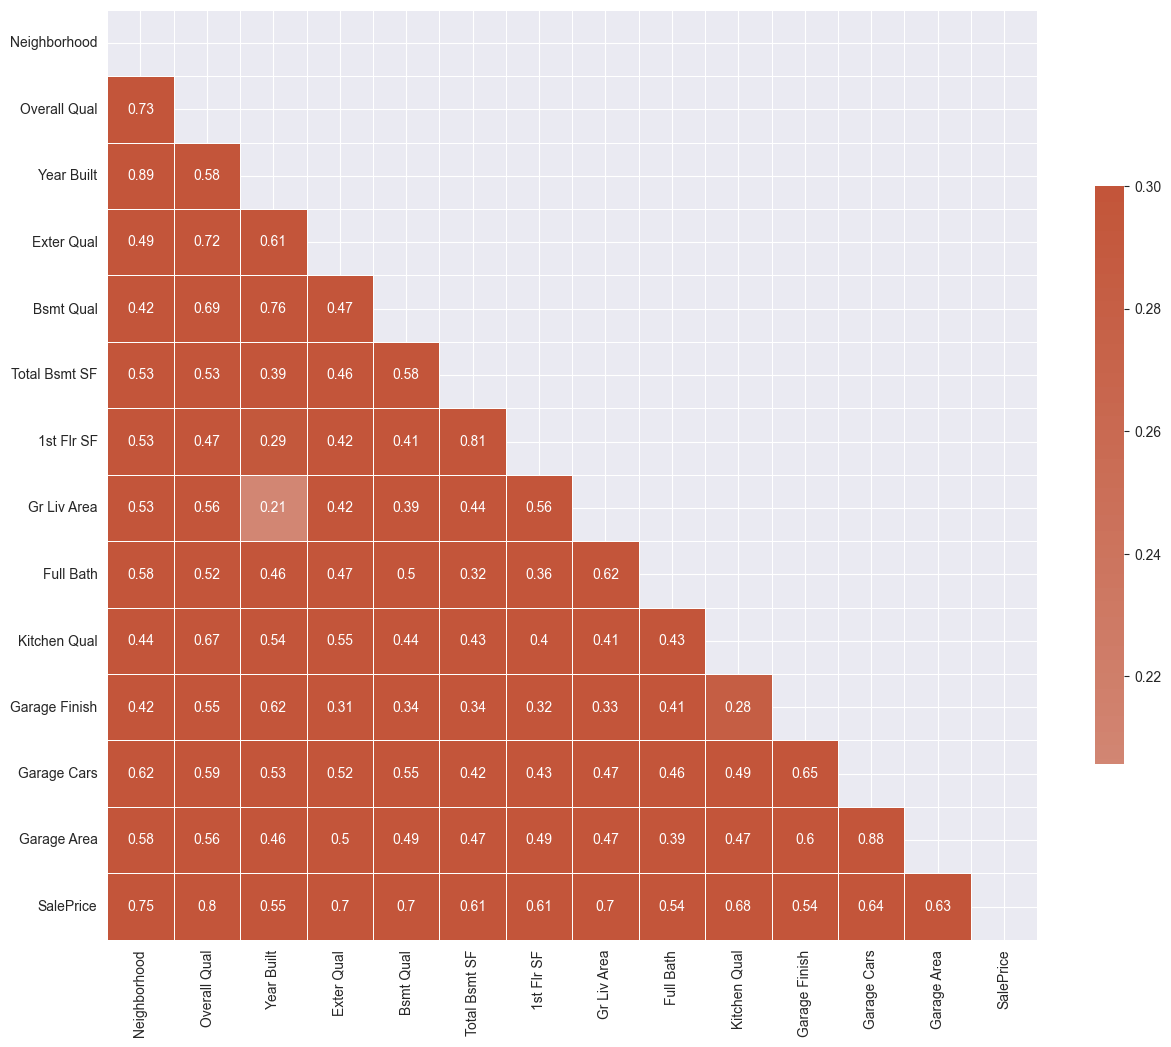

In [ ]:
sub_correlation= associations(df_sub_selection,compute_only=True)
mask = np.triu(np.ones_like(sub_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sub_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})


On voit que beaucoup de variables sont corrélées entre elles. On va s'orienter vers un modèle selectif pour pouvoir exclure les variables trop corrélées.

# Préparation des données en vue du modèle

In [ ]:
num_selected = ["Year Built", "Total Bsmt SF", "1st Flr SF", "Gr Liv Area", "Garage Area", "SalePrice"]
cat_num = ["Overall Qual", "Full Bath", "Garage Cars"]
cat_str = ["Neighborhood", "Exter Qual", "Bsmt Qual", "Kitchen Qual", "Garage Finish"]

In [ ]:
df[num_selected].isna().sum()

Year Built       0
Total Bsmt SF    1
1st Flr SF       0
Gr Liv Area      0
Garage Area      1
SalePrice        0
dtype: int64

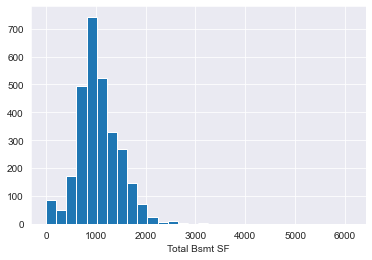

In [ ]:
plt.figure()
plt.hist(x=df["Total Bsmt SF"], bins=30)
plt.xlabel("Total Bsmt SF")
plt.show()

In [ ]:
df["Total Bsmt SF"].mean()

1051.596928327645

In [ ]:
df["Total Bsmt SF"].fillna(1052, inplace=True)

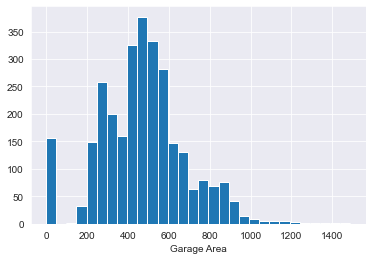

In [ ]:
plt.figure()
plt.hist(x=df["Garage Area"], bins=30)
plt.xlabel("Garage Area")
plt.show()

In [ ]:
df["Garage Area"].mean()

472.8197336975077

In [ ]:
df["Garage Area"].fillna(472, inplace=True)

In [ ]:
df[cat_num].isna().sum()

Overall Qual    0
Full Bath       0
Garage Cars     1
dtype: int64

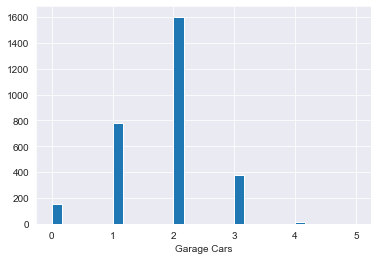

In [ ]:
plt.figure()
plt.hist(x=df["Garage Cars"], bins=30)
plt.xlabel("Garage Cars")
plt.show()

In [ ]:
df["Total Bsmt SF"].fillna(2, inplace=True)

In [ ]:
df[cat_str].isna().sum()

Neighborhood       0
Exter Qual         0
Bsmt Qual         80
Kitchen Qual       0
Garage Finish    159
dtype: int64

In [ ]:
df["Bsmt Qual"].value_counts()

TA    1363
Gd    1219
Ex     258
Fa      88
Po       2
Name: Bsmt Qual, dtype: int64

In [ ]:
df["Bsmt Qual"].fillna("TA", inplace=True)

In [ ]:
df["Garage Finish"].value_counts()

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

<AxesSubplot:>

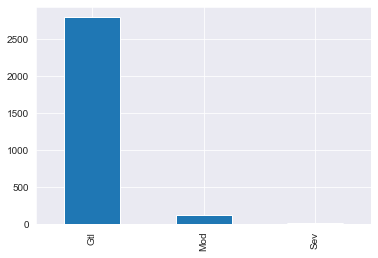

In [ ]:
df["Land Slope"].value_counts().plot(kind='bar')

In [ ]:
df["Bsmt Qual"].fillna("Unf", inplace=True)